In [12]:
!sudo apt-get install -y fonts-nanum
!fc-cache -fv
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 65 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [51]:
!pip install xgboost

import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from google.colab import drive

In [114]:
drive.mount('/content/gdrive/')

file_path = '/content/gdrive/MyDrive/빅데이터/과제/final_emp_financial.csv'

df_original = pd.read_csv(file_path)

print(df_original.info())

numeric_cols = df_original.select_dtypes(include=['int64', 'float64']).columns
df_original[numeric_cols].describe()

df_original['보고서유형코드'] = df_original['보고서유형'].map({'반기보고서': 0, '사업보고서': 1})
df_original = df_original.sort_values(["기업명", "연도", "보고서유형코드"]).reset_index(drop=True)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10116 entries, 0 to 10115
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기업명        10116 non-null  object 
 1   연도         10116 non-null  int64  
 2   보고서유형      10116 non-null  object 
 3   평균급여       10116 non-null  float64
 4   남성직원수      10116 non-null  float64
 5   여성직원수      10116 non-null  float64
 6   정규직수       10116 non-null  float64
 7   계약직수       10116 non-null  float64
 8   남성정규직수     10116 non-null  float64
 9   남성계약직수     10116 non-null  float64
 10  여성정규직수     10116 non-null  float64
 11  여성계약직수     10116 non-null  float64
 12  평균급여증감율    10116 non-null  float64
 13  남성직원수증감율   10116 non-null  float64
 14  여성직원수증감율   10116 non-null  float64
 15  정규직수증감율    10116 non-null  float64
 16  계약직수증감율    10116 non-null  float6

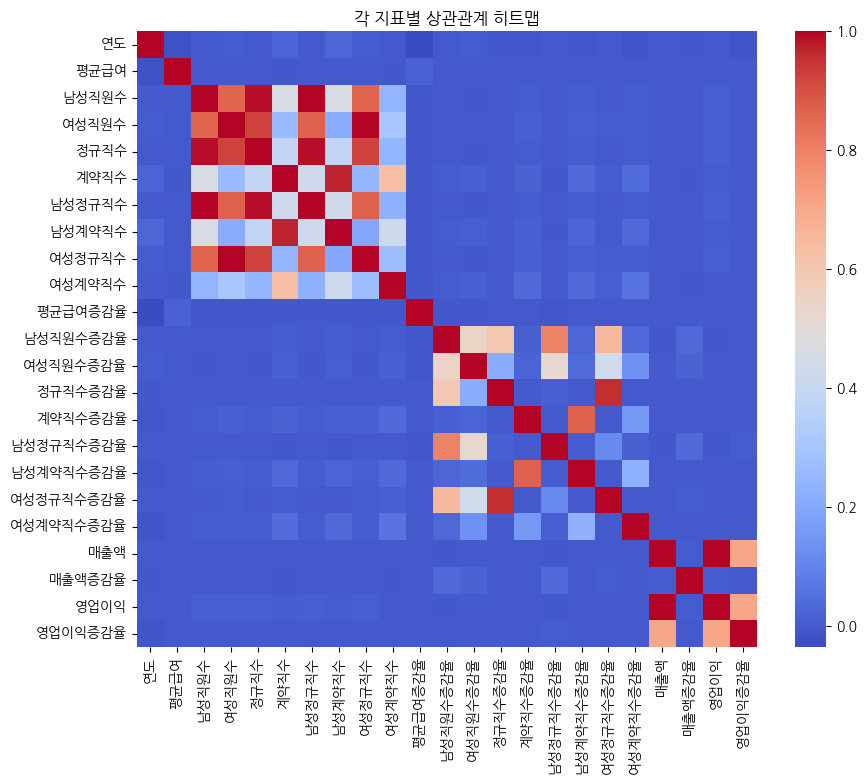

In [120]:
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

plt.figure(figsize=(10,8))
sns.heatmap(df_original[numeric_cols].corr(), annot=False, cmap="coolwarm")
plt.title("각 지표별 상관관계 히트맵")
plt.show()

MSE: 402077.61436653533
RMSE: 634.0959031302248
R²: -0.003716862793579301


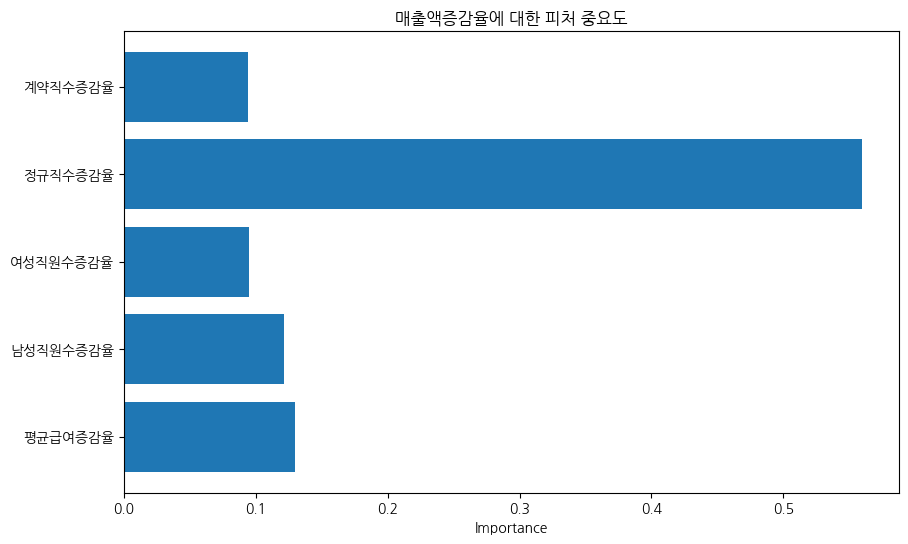

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipython-input-2058824020.py:56: RuntimeWarning: invalid value encountered in log1p
  plt.scatter(np.log1p(y_test), np.log1p(pred), alpha=0.5)


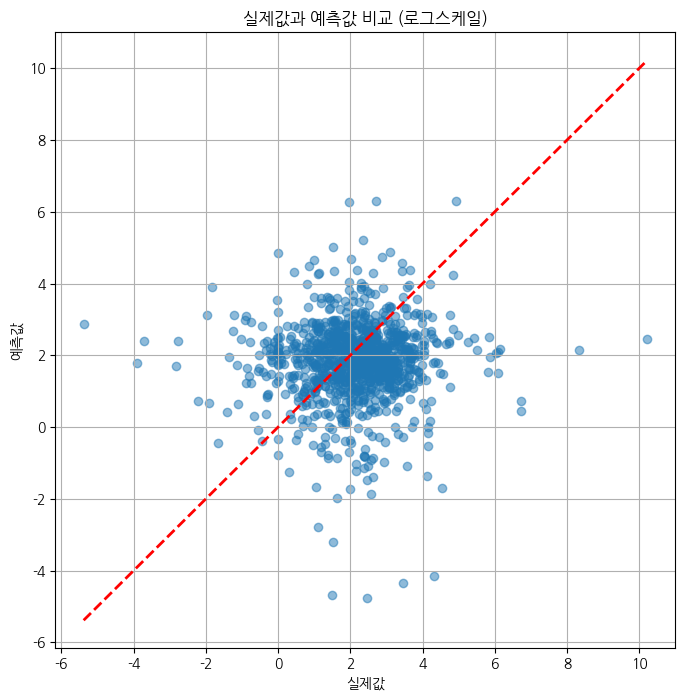

In [122]:
# 고용구조와 매출액증감율의 관계 분석 및 회귀 모델링

features = [
    '평균급여증감율',
    '남성직원수증감율', '여성직원수증감율',
    '정규직수증감율', '계약직수증감율',
]

target = '매출액증감율'

df = df_original

# 결측치 제거
data = df[features + [target]].dropna()

# 학습 데이터셋 분할
from sklearn.model_selection import train_test_split

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

# 랜덤 포레스트 회귀
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("MSE:", mse)
print("RMSE:", mse**0.5)
print("R²:", r2)

# importance 시각화
import numpy as np

importance = model.feature_importances_

plt.figure(figsize=(10,6))
plt.barh(features, importance)
plt.xlabel("Importance")
plt.title("매출액증감율에 대한 피처 중요도")
plt.show()

# 실제값 vs 예측값 시각화 (로그스케일)
plt.figure(figsize=(8, 8))
plt.scatter(np.log1p(y_test), np.log1p(pred), alpha=0.5)
plt.plot([np.log1p(y_test).min(), np.log1p(y_test).max()],
         [np.log1p(y_test).min(), np.log1p(y_test).max()],
         'r--', linewidth=2)

plt.xlabel("실제값")
plt.ylabel("예측값")
plt.title("실제값과 예측값 비교 (로그스케일)")
plt.grid(True)
plt.show()

MSE : 3.2210665816080896e+30
RMSE: 1794733011232615.0
R² : -0.0005165741244654853


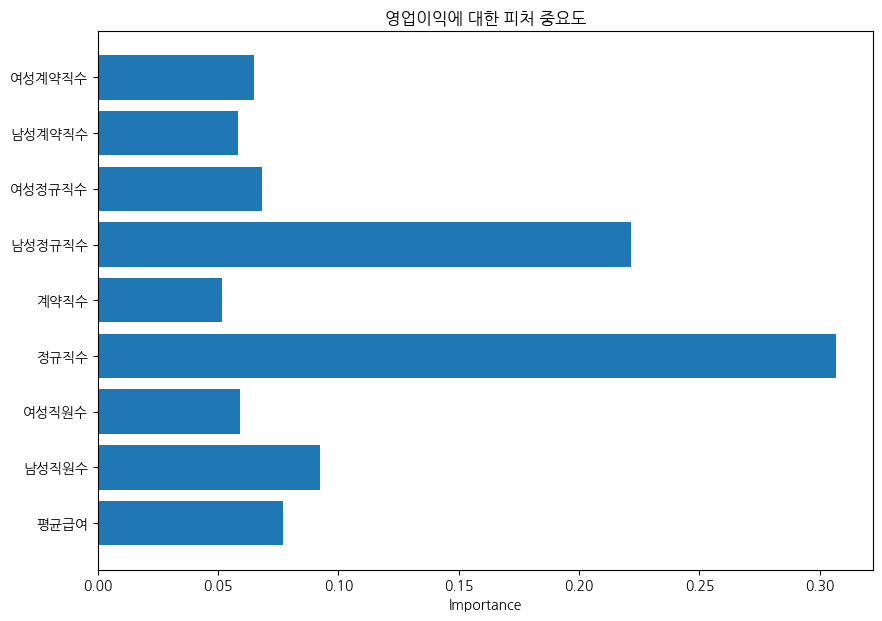

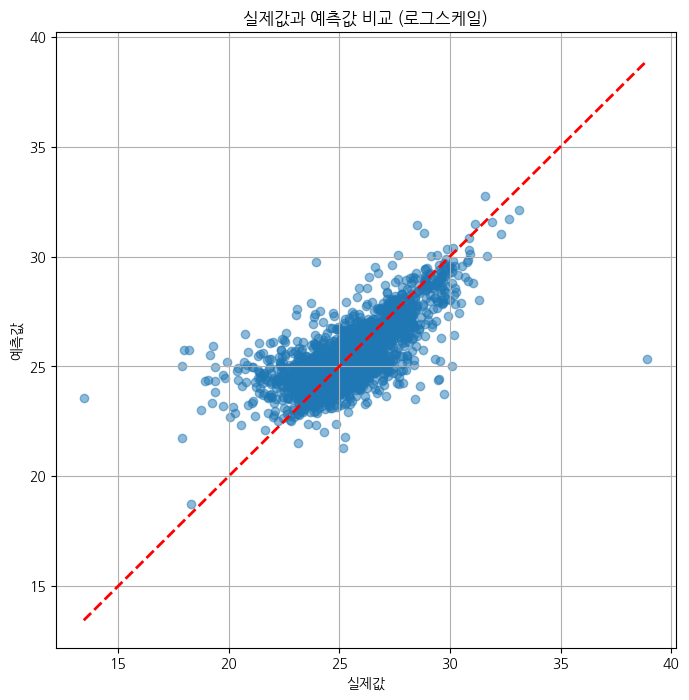

In [123]:
# 고용구조와 영업이익의 관계 분석 xgboost

df = df_original

# 1. 매출액 / 평균급여 숫자 정제
for col in ['영업이익', '평균급여']:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r'[^0-9]', '', regex=True)   # 숫자만 남기기
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')
# 로그 변환 가능하도록 양수만 남기기
df = df[(df['영업이익'] > 0) & (df['평균급여'] > 0)]

# 2. 사용할 변수
features = [
    '평균급여',
    '남성직원수', '여성직원수',
    '정규직수', '계약직수',
    '남성정규직수', '여성정규직수',
    '남성계약직수', '여성계약직수',
]

target = '영업이익'

# 3. 결측치 제거
data = df[features + [target]].dropna()

X = data[features]
y = data[target]

# 4. 로그 변환
y_log = np.log1p(y)  # log(1+y)


# 5. 학습 데이터 분리
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# 6. XGBoost 회귀 모델 학습
model = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)
model.fit(X_train, y_train_log)

# 7. 예측 및 평가
pred_log = model.predict(X_test)
y_pred = np.expm1(pred_log)     # 예측 복원
y_test = np.expm1(y_test_log)   # 실제값 복원

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R² :", r2)

# 8. Feature Importance 시각화
importance = model.feature_importances_

plt.figure(figsize=(10,7))
plt.barh(features, importance)
plt.title("영업이익에 대한 피처 중요도")
plt.xlabel("Importance")
plt.show()

# 9. 실제값 vs 예측값 시각화 (로그스케일)
plt.figure(figsize=(8, 8))
plt.scatter(np.log1p(y_test), np.log1p(y_pred), alpha=0.5)
plt.plot([np.log1p(y_test).min(), np.log1p(y_test).max()],
         [np.log1p(y_test).min(), np.log1p(y_test).max()],
         'r--', linewidth=2)

plt.xlabel("실제값")
plt.ylabel("예측값")
plt.title("실제값과 예측값 비교 (로그스케일)")
plt.grid(True)
plt.show()

MSE : 1.0013983468136701e+27
RMSE: 31644878682239.723
R² : 0.8685197784375716


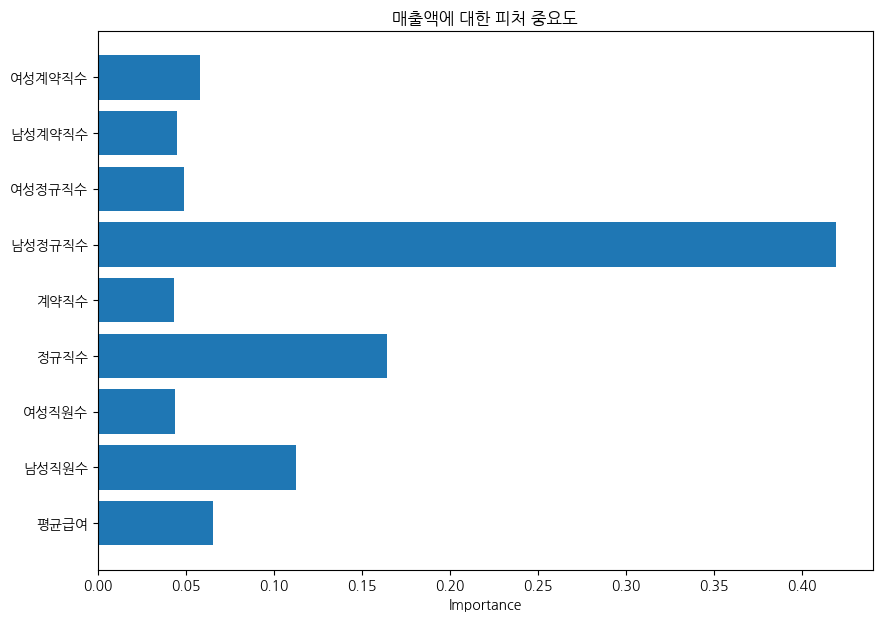

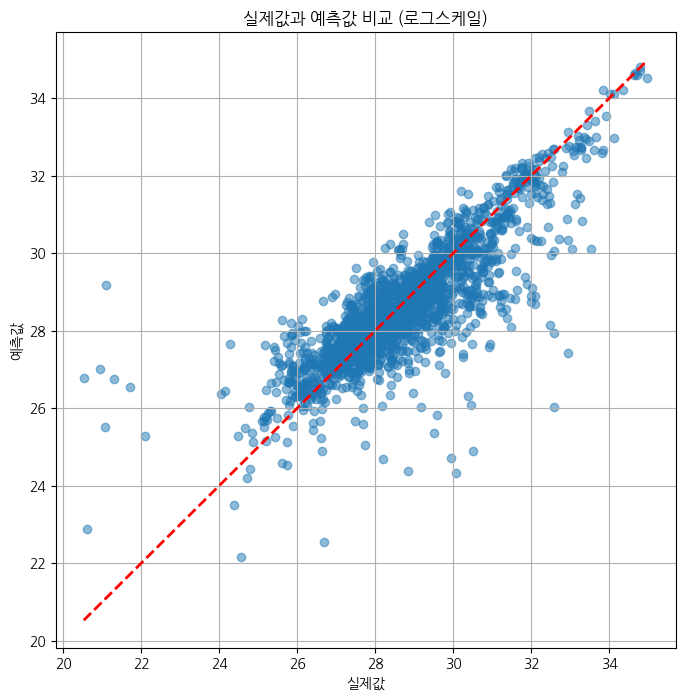

In [124]:
# 고용구조와 매출액의 관계 분석 xgboost

df = df_original

# 1. 매출액 / 평균급여 숫자 정제
for col in ['매출액', '평균급여']:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r'[^0-9]', '', regex=True)   # 숫자만 남기기
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 로그 변환 가능하도록 양수만 남기기
df = df[(df['매출액'] > 0) & (df['평균급여'] > 0)]

# 2. 사용할 변수
features = [
    '평균급여',
    '남성직원수', '여성직원수',
    '정규직수', '계약직수',
    '남성정규직수', '여성정규직수',
    '남성계약직수', '여성계약직수',
]

target = '매출액'

# 3. 결측치 제거
data = df[features + [target]].dropna()

X = data[features]
y = data[target]

# 4. 로그 변환
y_log = np.log1p(y)  # log(1+y)

# 5. 학습 데이터 분리
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# 6. XGBoost 회귀 모델 학습
model = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

model.fit(X_train, y_train_log)

# 7. 예측 및 평가
pred_log = model.predict(X_test)
y_pred = np.expm1(pred_log)     # 예측 복원
y_test = np.expm1(y_test_log)   # 실제값 복원

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R² :", r2)

# 8. Feature Importance 시각화
importance = model.feature_importances_

plt.figure(figsize=(10,7))
plt.barh(features, importance)
plt.title("매출액에 대한 피처 중요도")
plt.xlabel("Importance")
plt.show()

# 9. 실제값 vs 예측값 시각화 (로그스케일)
plt.figure(figsize=(8, 8))
plt.scatter(np.log1p(y_test), np.log1p(y_pred), alpha=0.5)
plt.plot([np.log1p(y_test).min(), np.log1p(y_test).max()],
         [np.log1p(y_test).min(), np.log1p(y_test).max()],
         'r--', linewidth=2)

plt.xlabel("실제값")
plt.ylabel("예측값")
plt.title("실제값과 예측값 비교 (로그스케일)")
plt.grid(True)
plt.show()